# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1yJKgmHrRFnBk987HJfeDrMcTEXtk0z7W"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Employee Retention Prediction
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=10NJUOTWOBzp2MNkgcPpCF0fLtdoN_jKj)

![alt text](https://drive.google.com/uc?id=1evbDHoW2t0emxkbQd8yevYFZ5woJKRPY)

![alt text](https://drive.google.com/uc?id=1Mk2H7VYfv6ijUS9XqEdBQV6_LaHiyvkJ)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
employees_df = pd.read_csv("/content/Human_Resources (2).csv")

In [ ]:
employees_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
employees_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
employees_df.shape

(1470, 35)

In [ ]:
employees_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


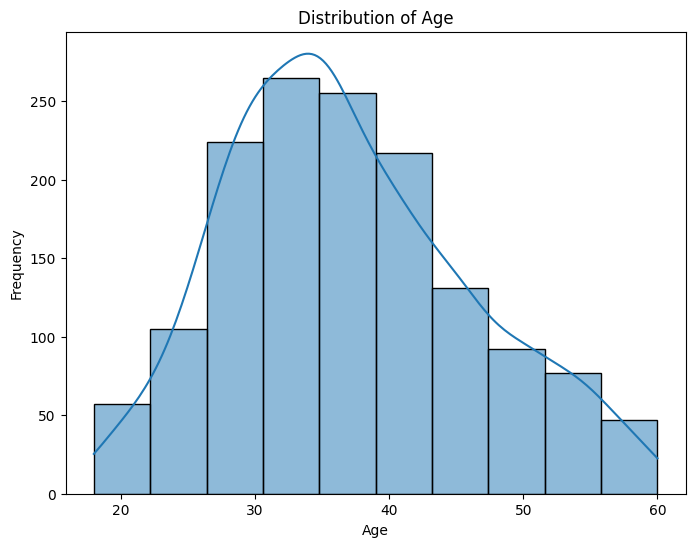

<ipython-input-10-7e6071c42112>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=employees_df, x="Department", y="YearsSinceLastPromotion", palette="Set2")


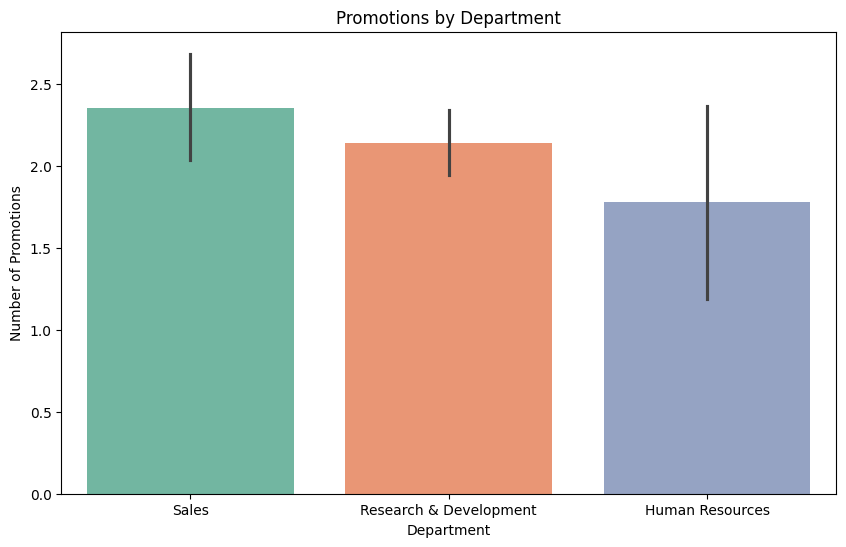

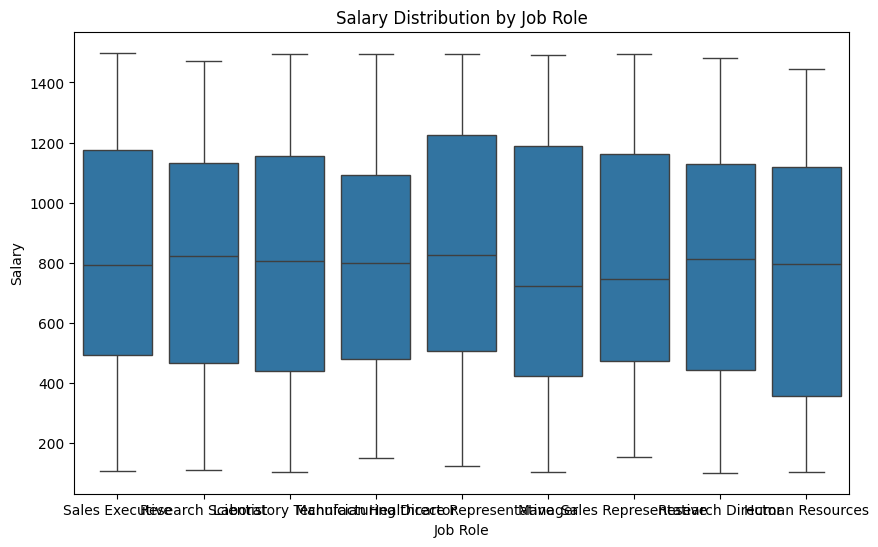

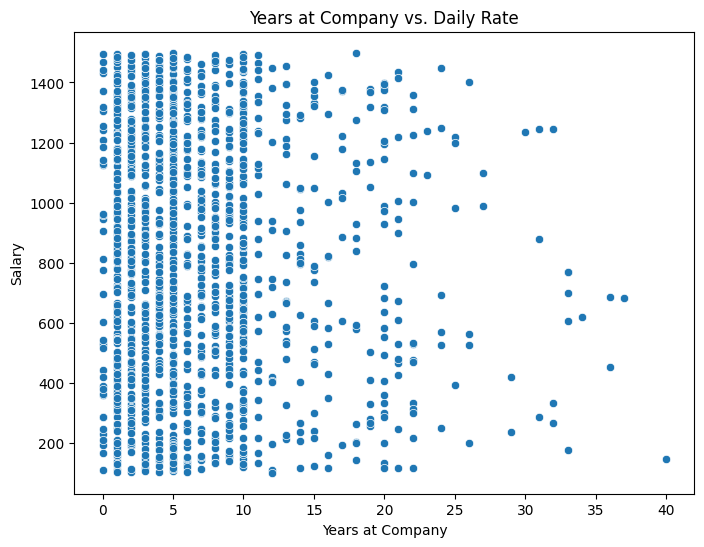

In [ ]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=employees_df, x="Age", bins=10, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Bar Plot for Promotions by Department
plt.figure(figsize=(10, 6))
sns.barplot(data=employees_df, x="Department", y="YearsSinceLastPromotion", palette="Set2")
plt.title("Promotions by Department")
plt.xlabel("Department")
plt.ylabel("Number of Promotions")
plt.show()

# Boxplot for Salary Distribution by Job Role
plt.figure(figsize=(10, 6))
sns.boxplot(data=employees_df, x="JobRole", y="DailyRate")
plt.title("Salary Distribution by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Salary")
plt.show()

# Scatter Plot for Years at Company vs. Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=employees_df, x="YearsAtCompany", y="DailyRate")
plt.title("Years at Company vs. Daily Rate")
plt.xlabel("Years at Company")
plt.ylabel("Salary")
plt.show()

# TASK #3: VISUALIZE DATASET

In [ ]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations
employees_df['Attrition'] = employees_df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)



In [ ]:
employees_df['Over18'] = employees_df['Over18'].apply(lambda x:1 if x == 'Y' else 0)
employees_df['OverTime'] = employees_df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
employees_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<Axes: >

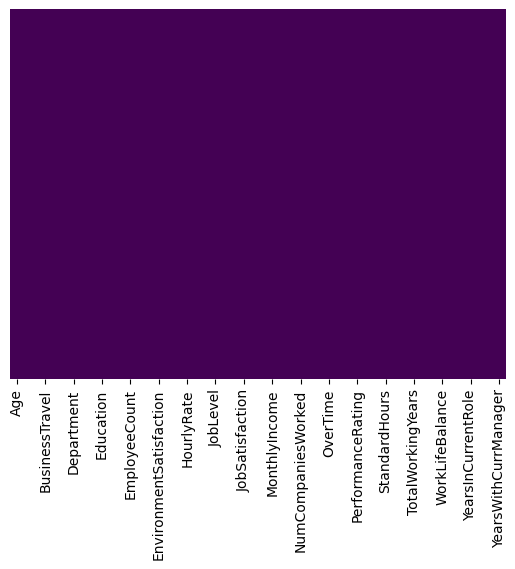

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(employees_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

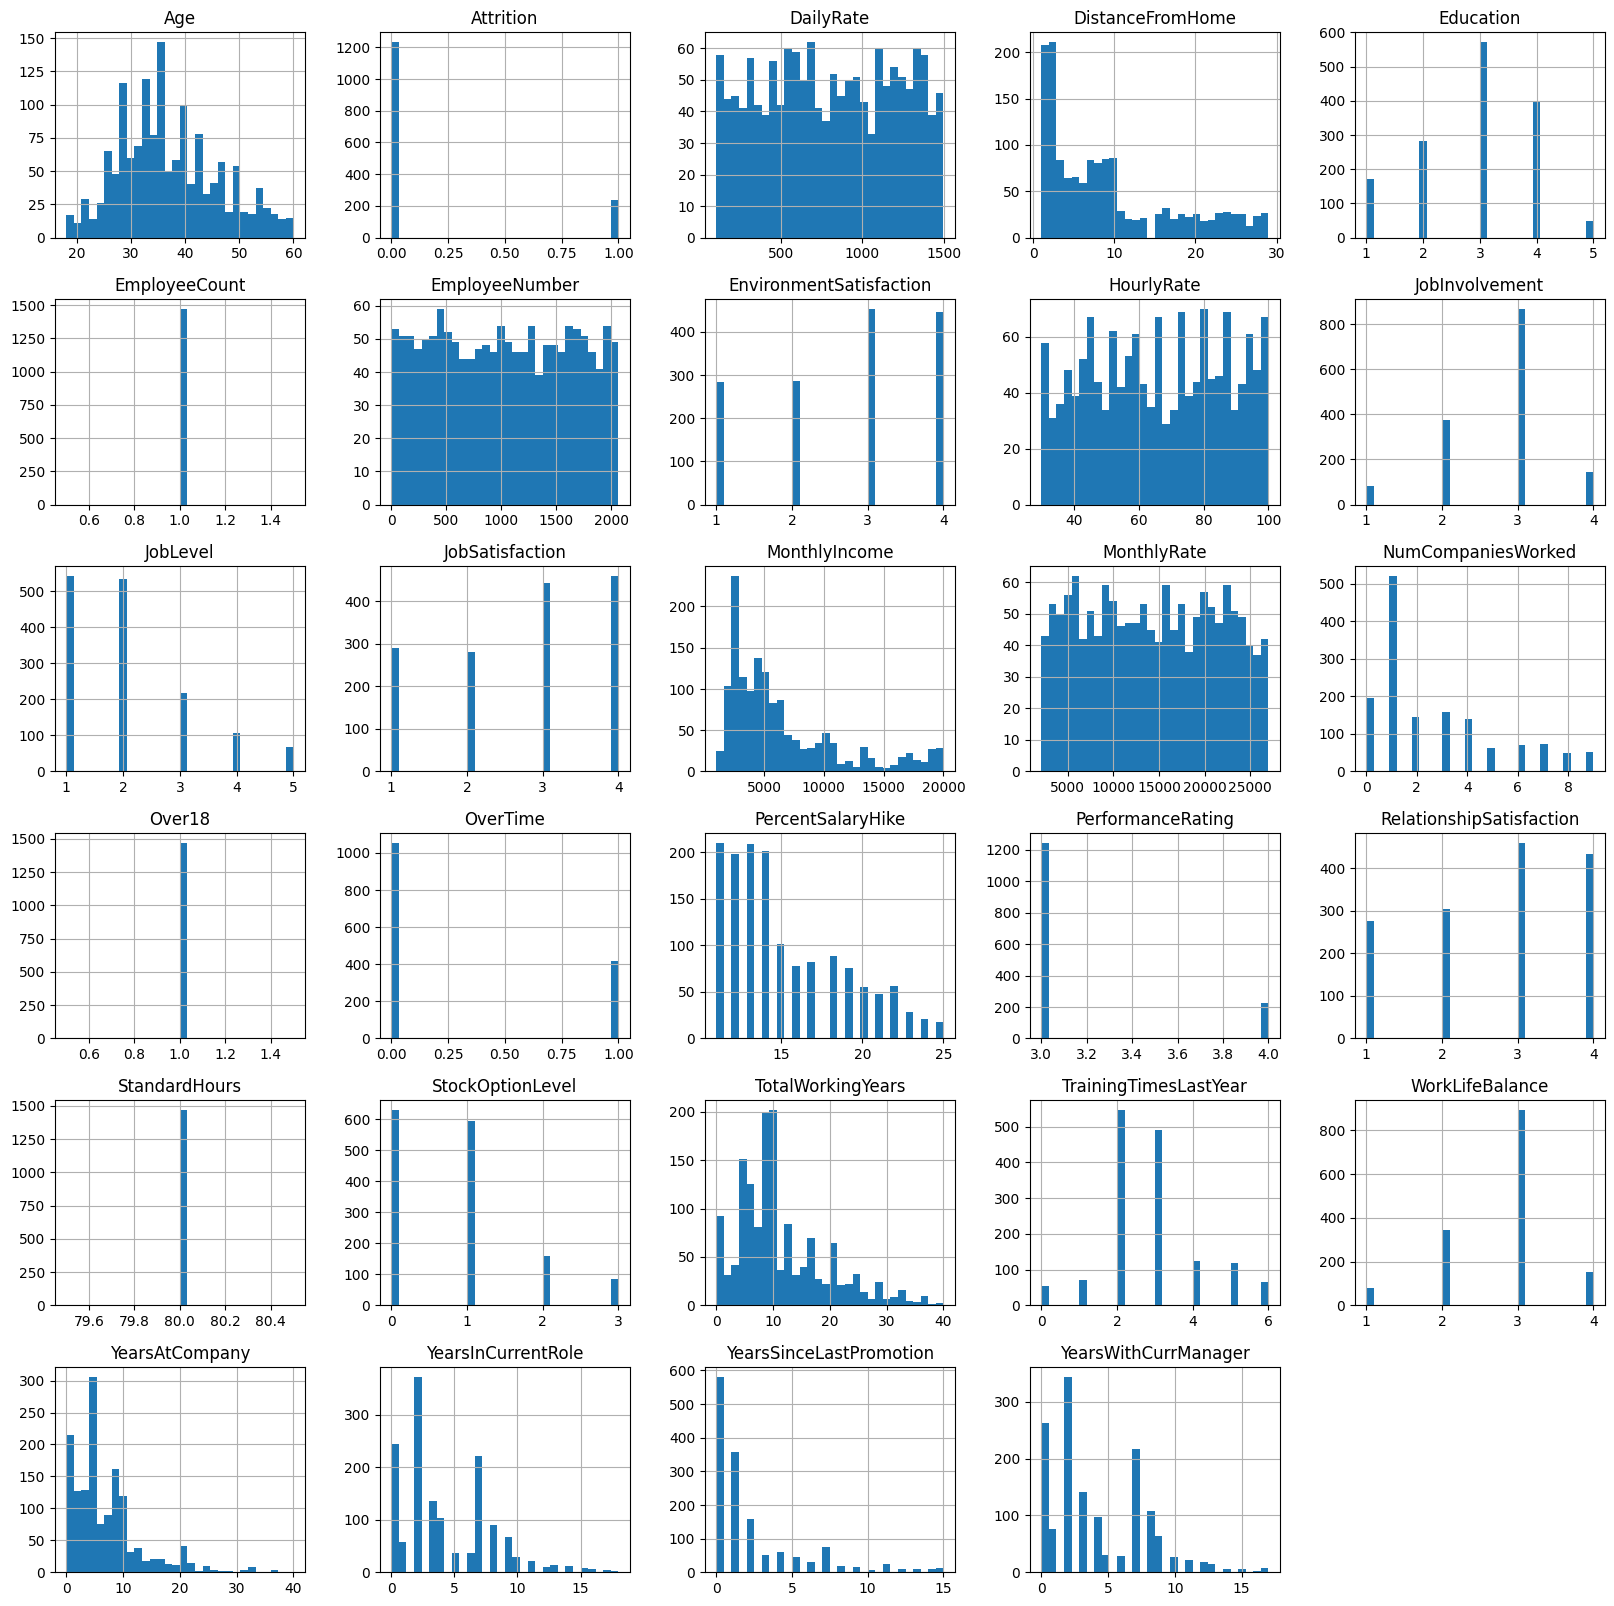

In [ ]:
employees_df.hist(bins=30, figsize=(20, 20))
plt.show()

In [ ]:
# Drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
employees_df = employees_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)
employees_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
employees_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
# Let's see how many employees left the company!
employees_df.Attrition.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [ ]:
left_df = employees_df[employees_df.Attrition == 1]
stayed_df = employees_df[employees_df.Attrition == 0]

In [ ]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset
print('Total = ', len(employees_df))
print(f"Number of Employees who left {len(left_df)}")
print(f"% of employees who left: {1 * len(left_df)/ len(employees_df) * 100}")

print(f"Number of Employees who stayed {len(stayed_df)}")
print(f"% of employees who stayed: {1 * len(stayed_df)/ len(employees_df) * 100}")

Total =  1470
Number of Employees who left 237
% of employees who left: 16.122448979591837
Number of Employees who stayed 1233
% of employees who stayed: 83.87755102040816


In [ ]:
left_df.describe()

#  Let's compare the mean and std of the employees who stayed and left
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [ ]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<Axes: >

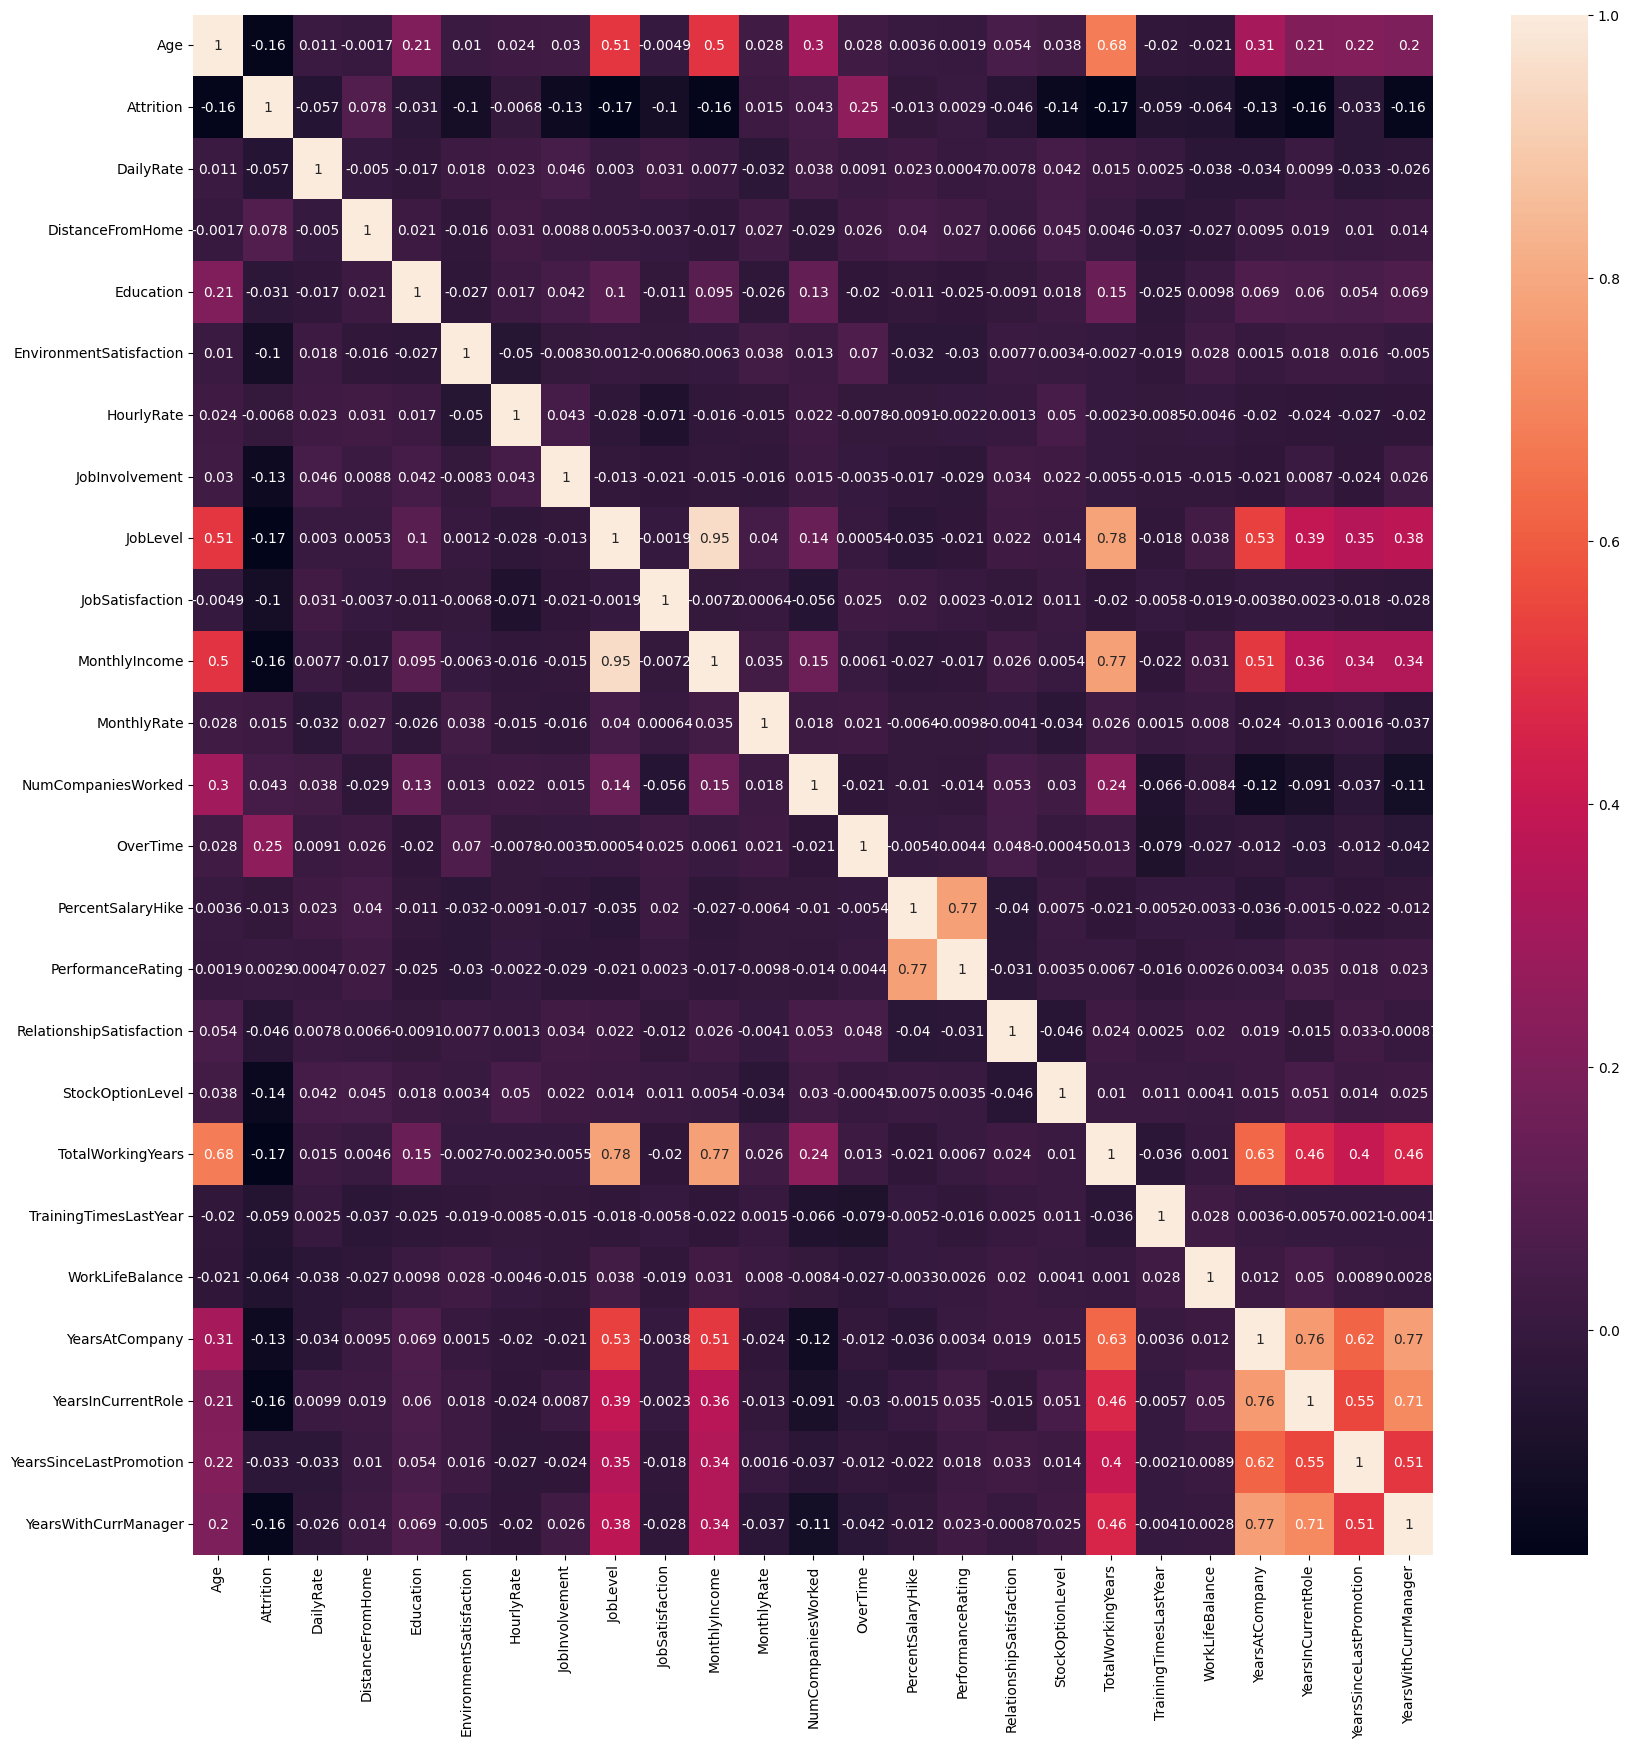

In [ ]:
# Correlations
# Select only numerical columns for correlation calculation
numerical_df = employees_df.select_dtypes(include=['number'])
correlations = numerical_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
import seaborn as sns
sns.heatmap(correlations, annot=True)

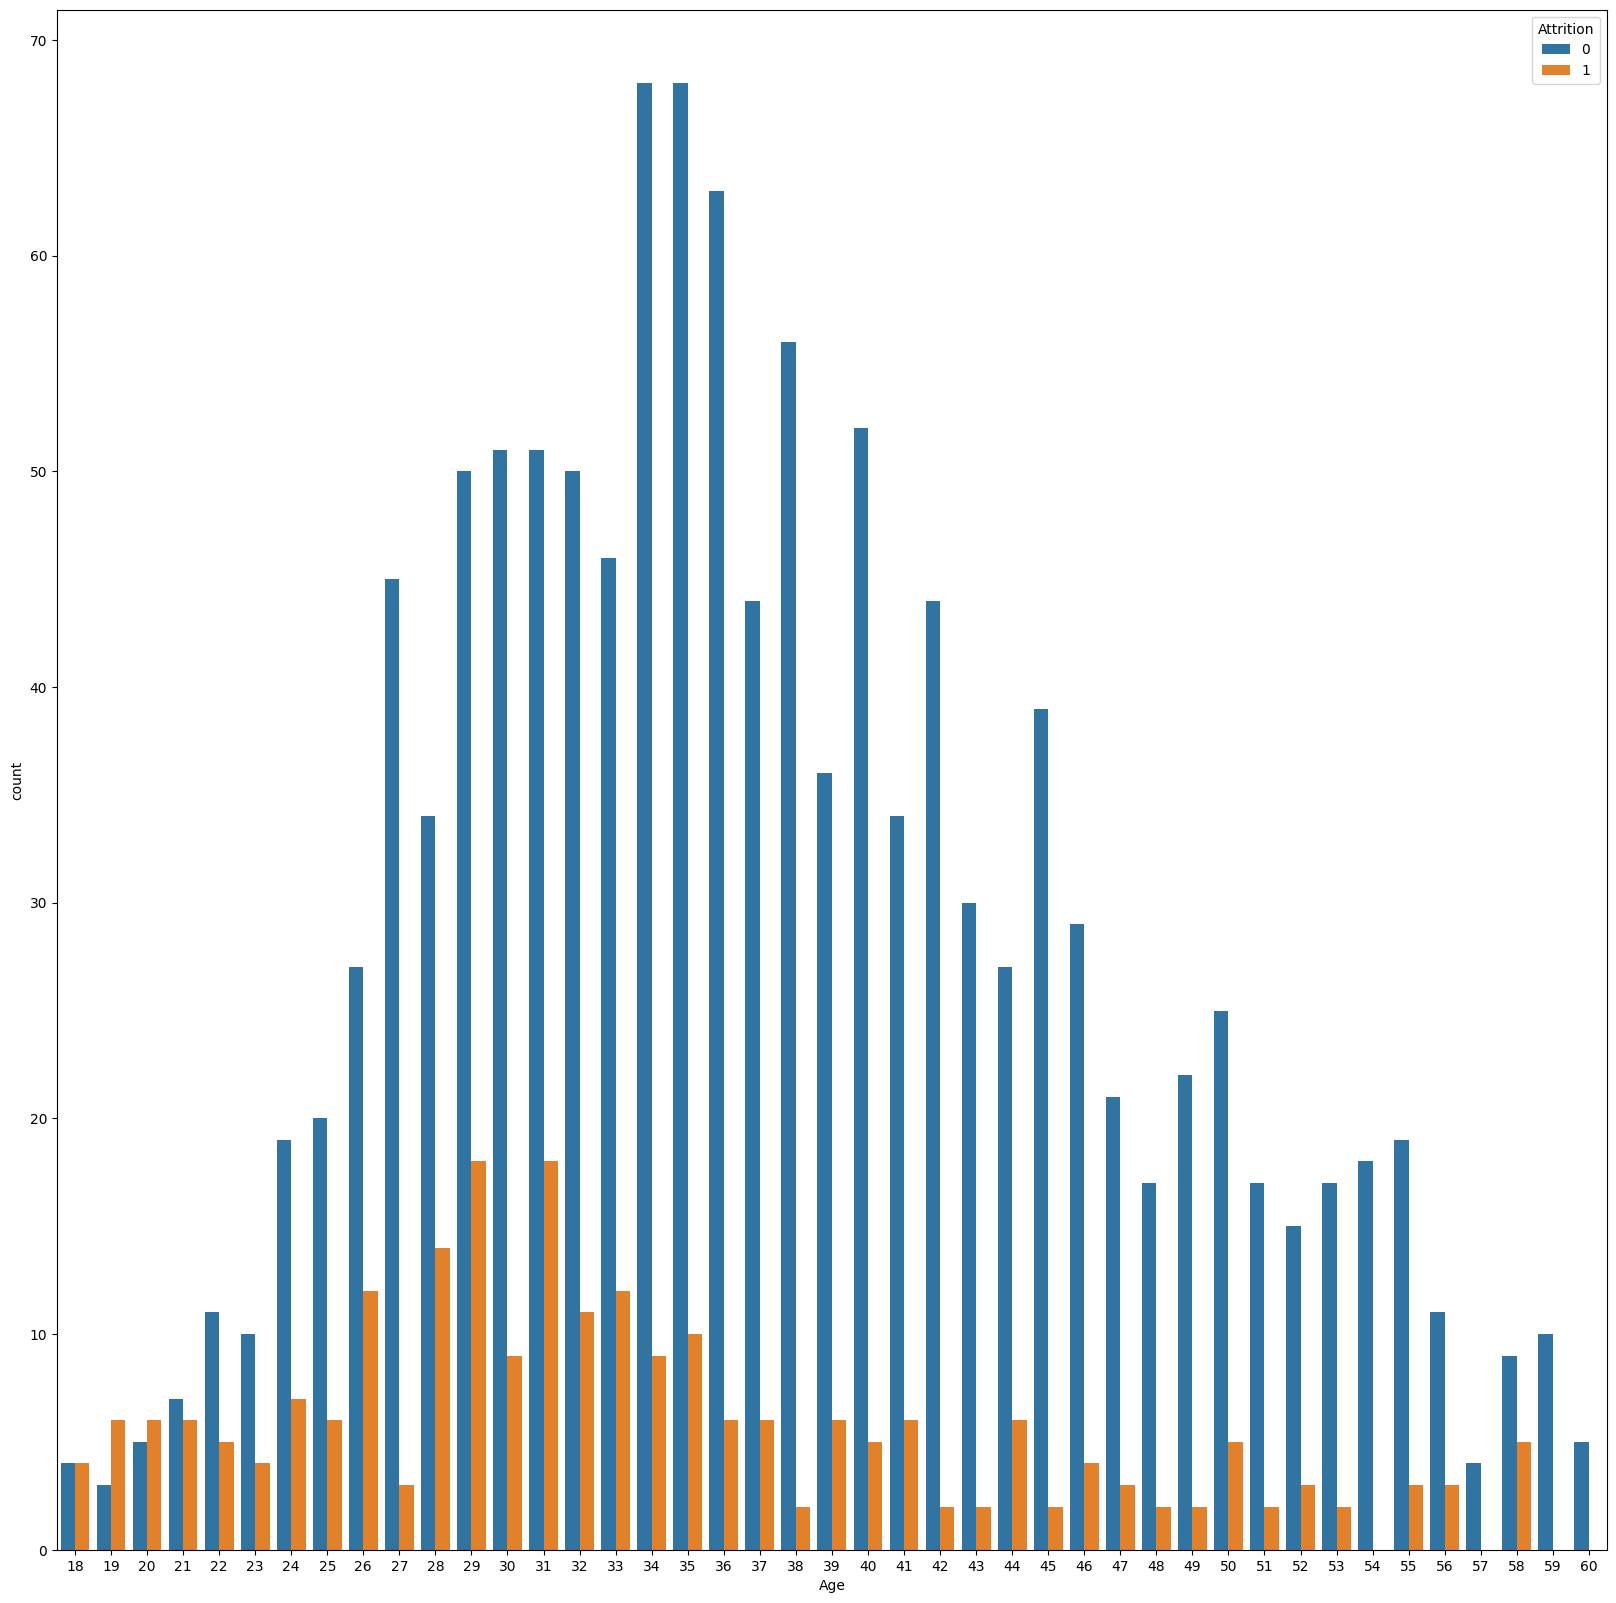

In [ ]:
# Relationship between age and attrition
plt.figure(figsize = [20, 20])
sns.countplot(x = 'Age', hue = 'Attrition', data = employees_df)
plt.show()

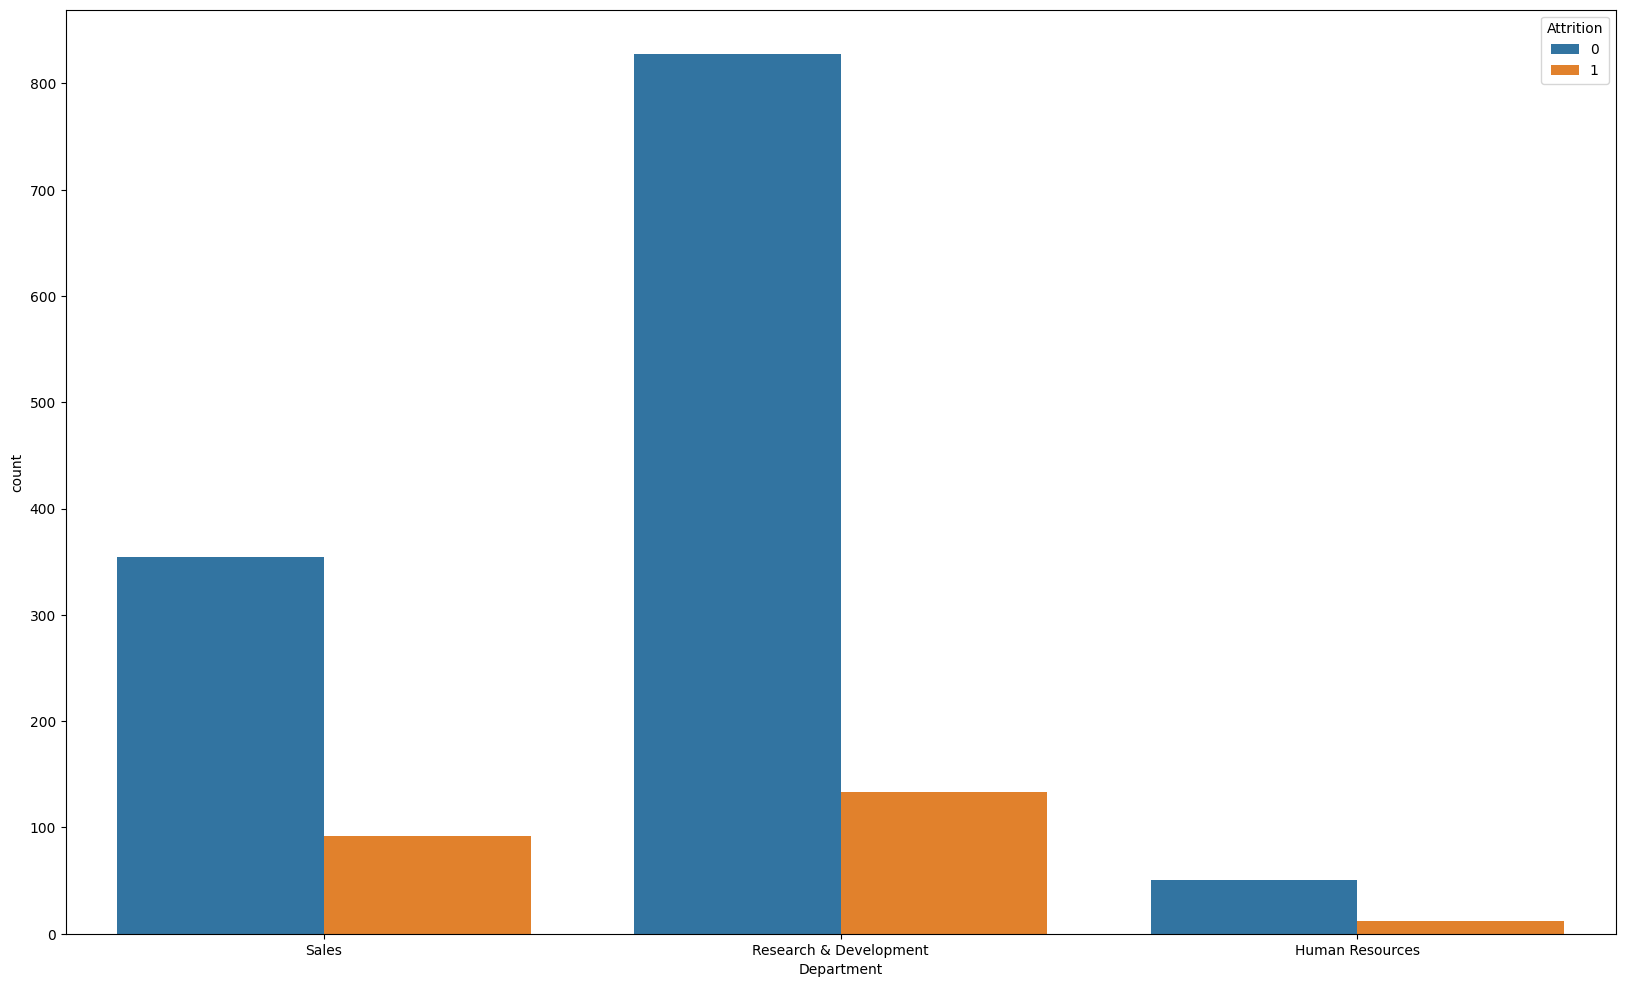

In [ ]:
#
plt.figure(figsize = [20, 12])
sns.countplot(x = 'Department', hue = 'Attrition', data = employees_df)
plt.show()

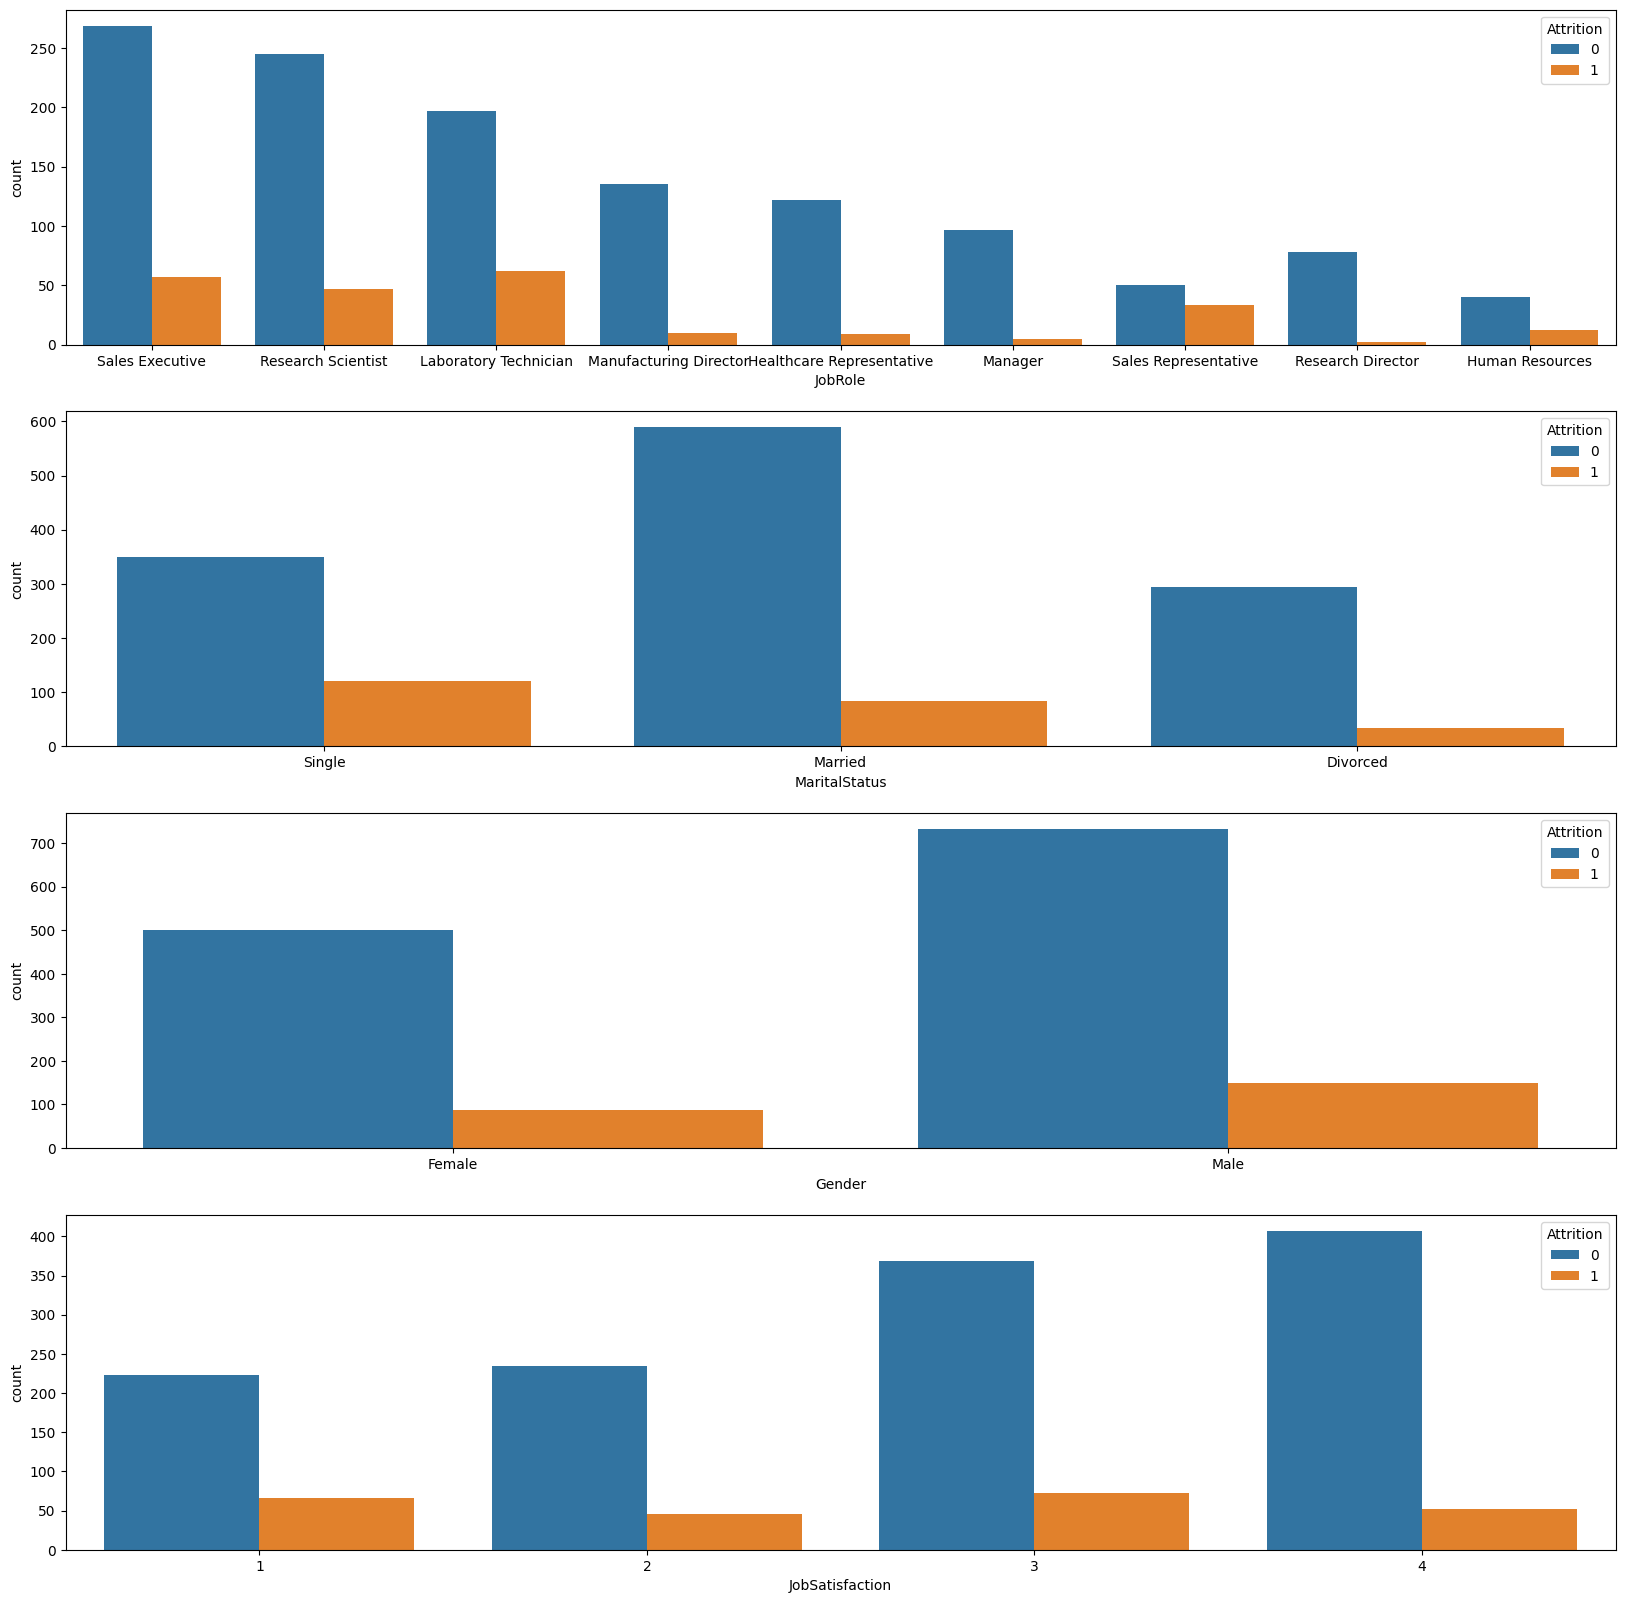

In [ ]:
plt.figure(figsize = [20, 20])

plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employees_df)

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employees_df)

plt.subplot(413)
sns.countplot(x = 'Gender', hue = 'Attrition', data = employees_df)

plt.subplot(414)
sns.countplot(x = 'JobSatisfaction', hue = 'Attrition', data = employees_df)

plt.show()

<ipython-input-26-1e873d7a6dbf>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df["DistanceFromHome"], label="Employees who left", shade = True , color= 'r')
<ipython-input-26-1e873d7a6dbf>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df["DistanceFromHome"], label= "Employees who stayed", shade = True, color = 'b')


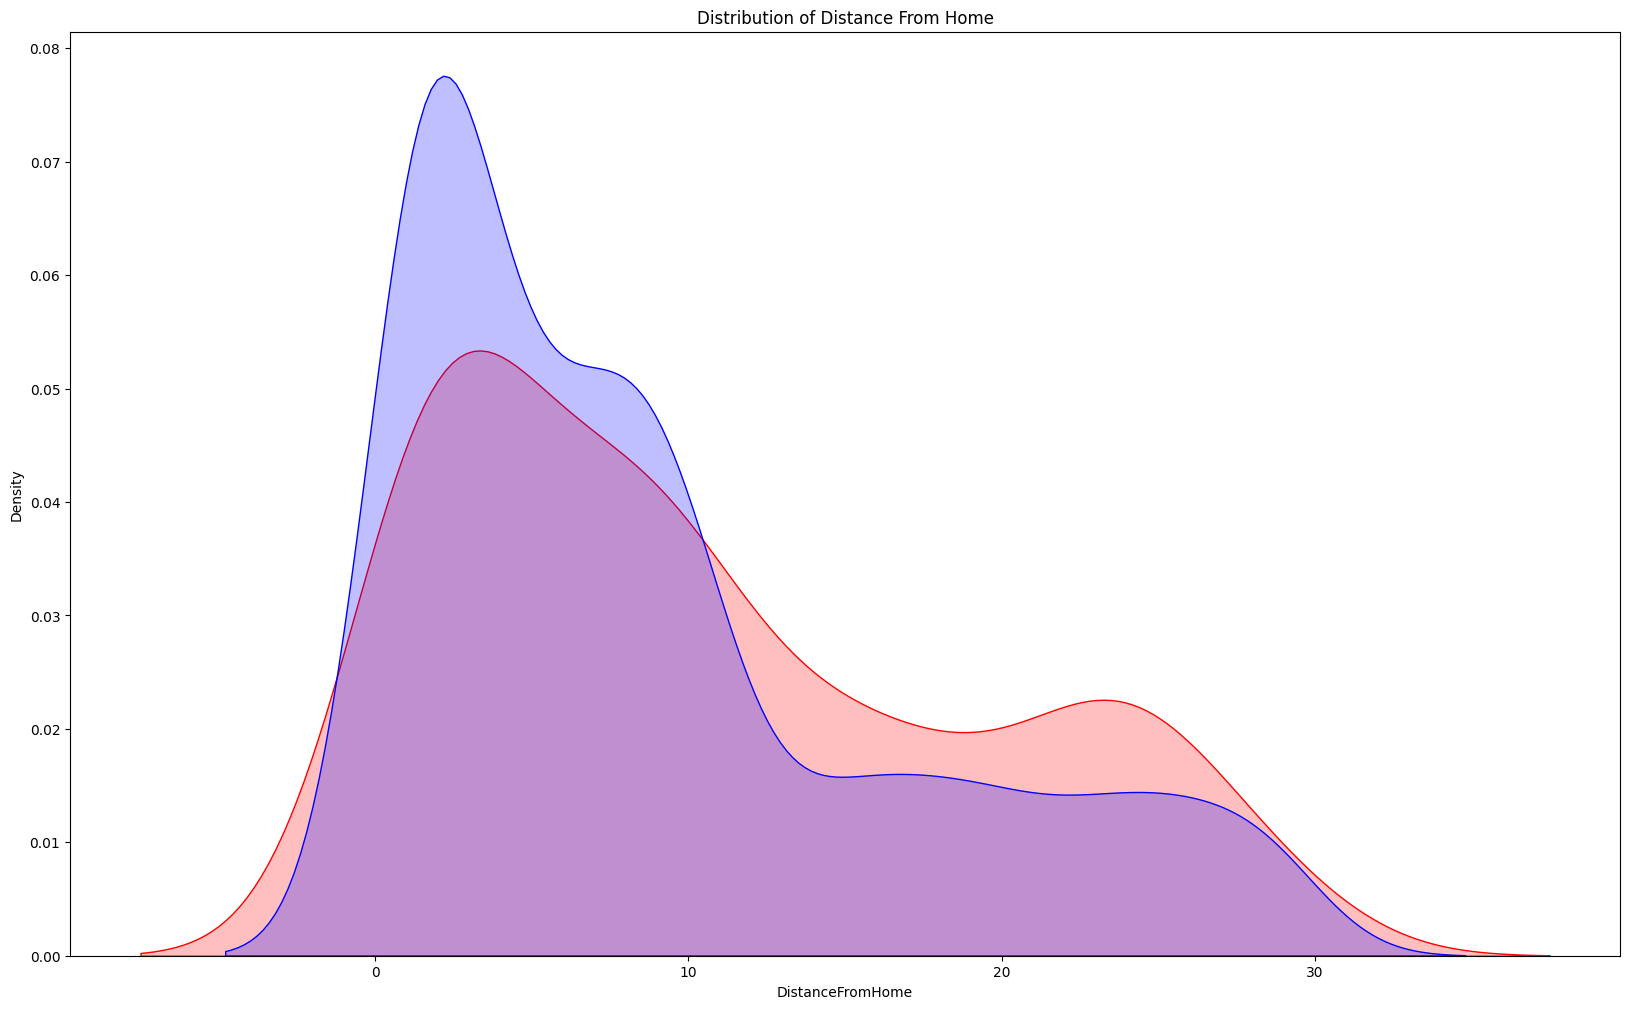

In [ ]:
# KDE (Kernel Density Estimate) is used for visualising the probability density of a conitnous variable
# KDE describes the probability density at different values in a continous variable

plt.figure(figsize = [20, 12])

sns.kdeplot(left_df["DistanceFromHome"], label="Employees who left", shade = True , color= 'r')
sns.kdeplot(stayed_df["DistanceFromHome"], label= "Employees who stayed", shade = True, color = 'b')
plt.title("Distribution of Distance From Home")
plt.show()

<ipython-input-27-a9f11afaef3c>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df["YearsWithCurrManager"], label="Employees who left", shade = True , color= 'r')
<ipython-input-27-a9f11afaef3c>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df["YearsWithCurrManager"], label= "Employees who stayed", shade = True, color = 'b')


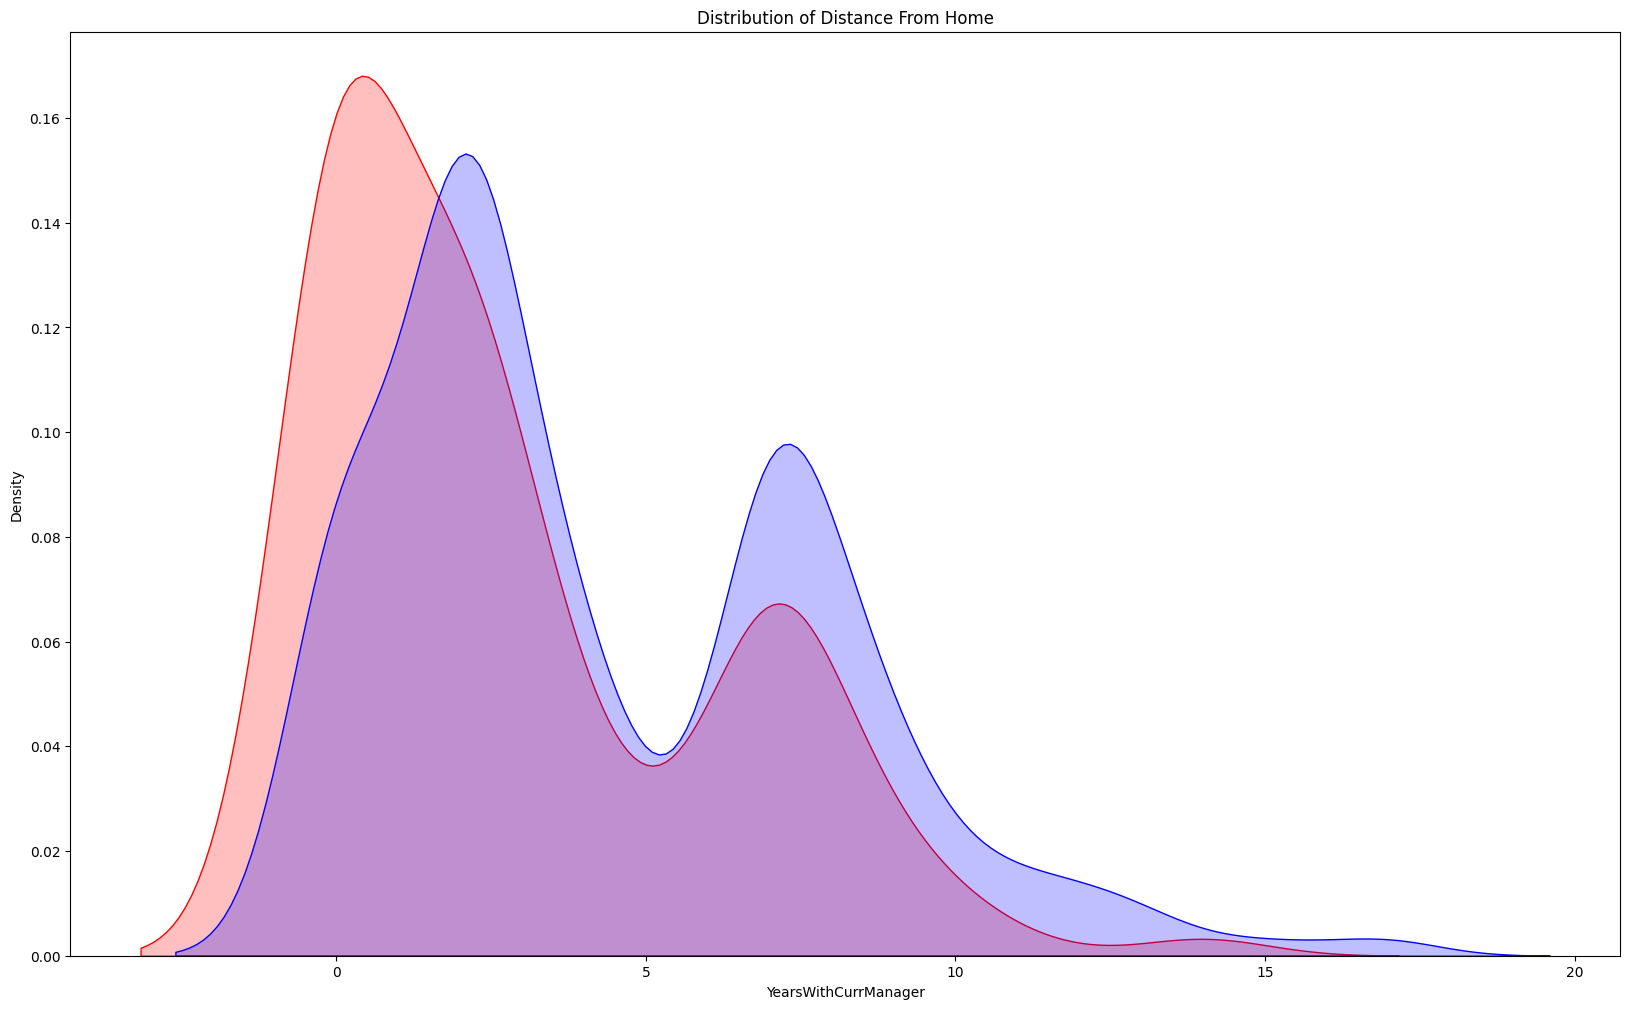

In [ ]:
plt.figure(figsize = [20, 12])

sns.kdeplot(left_df["YearsWithCurrManager"], label="Employees who left", shade = True , color= 'r')
sns.kdeplot(stayed_df["YearsWithCurrManager"], label= "Employees who stayed", shade = True, color = 'b')
plt.title("Distribution of Distance From Home")
plt.show()


<ipython-input-28-65f51c10613a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df["TotalWorkingYears"], label="Employees who left", shade = True , color= 'r')
<ipython-input-28-65f51c10613a>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df["TotalWorkingYears"], label= "Employees who stayed", shade = True, color = 'b')


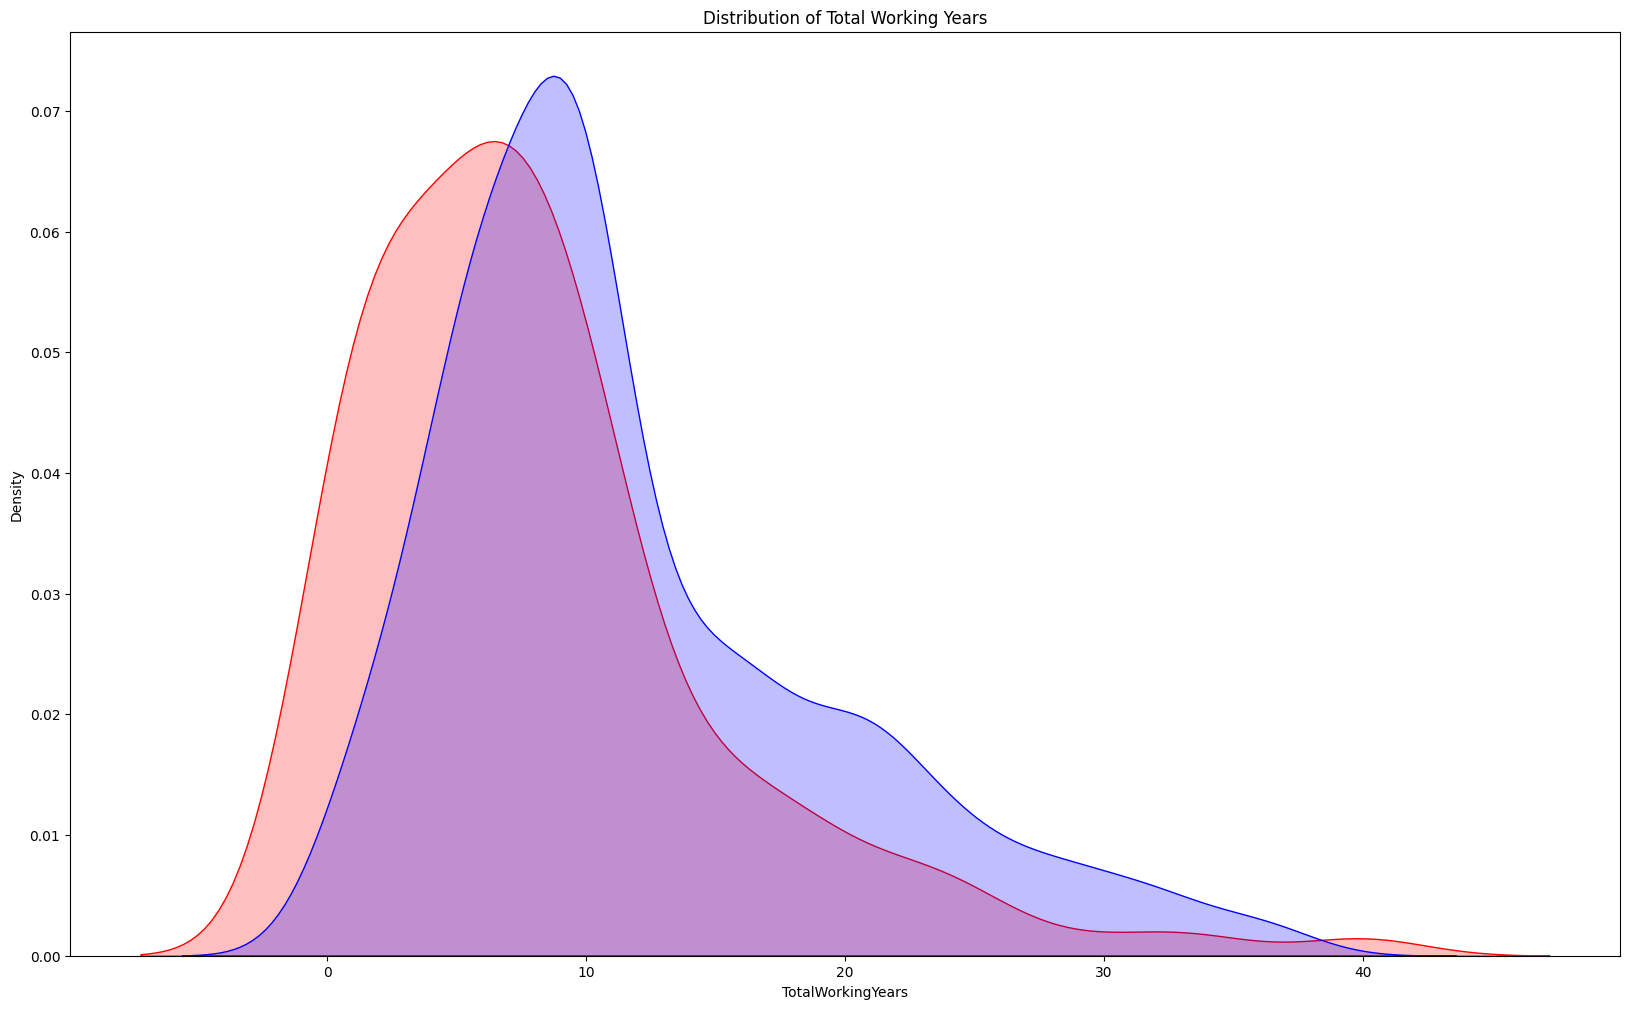

In [ ]:
plt.figure(figsize = [20, 12])

sns.kdeplot(left_df["TotalWorkingYears"], label="Employees who left", shade = True , color= 'r')
sns.kdeplot(stayed_df["TotalWorkingYears"], label= "Employees who stayed", shade = True, color = 'b')
plt.title("Distribution of Total Working Years")
plt.show()

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

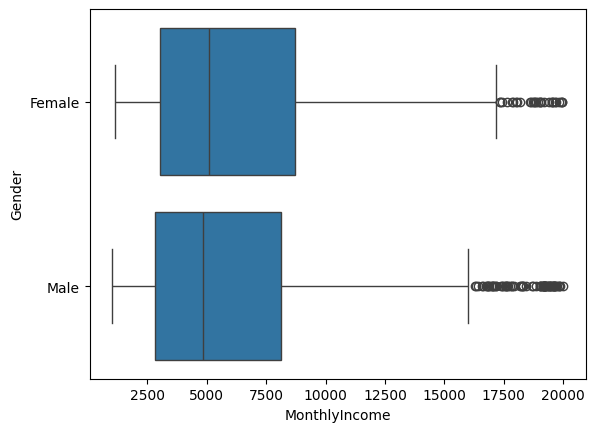

In [ ]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x = 'MonthlyIncome', y ='Gender', data = employees_df)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

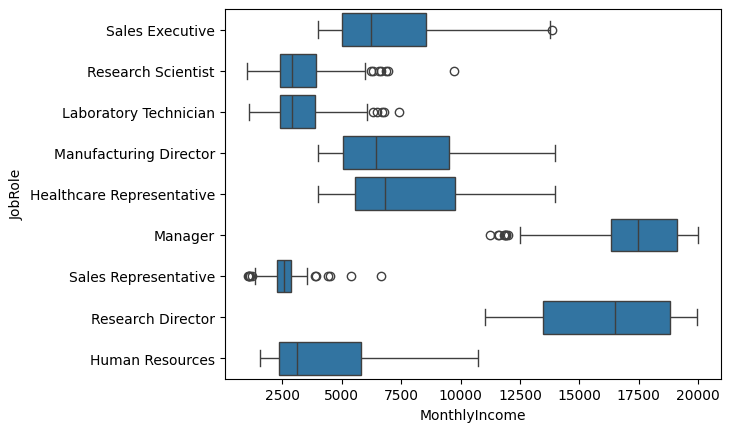

In [ ]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x = 'MonthlyIncome', y ='JobRole', data = employees_df)

# TASK #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [ ]:
employees_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


In [ ]:
X_cat = employees_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# note that we dropped the target 'Attrition
X_numerical = employees_df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel']]

In [ ]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [ ]:
X_all

,0,1,2,3,4,5,6,7,8,9,...,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,41,1102,1,2,2,94,3,2
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,49,279,8,1,3,61,2,2
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,37,1373,2,2,4,92,2,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,33,1392,3,4,4,56,3,1
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,27,591,2,1,1,40,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,36,884,23,2,3,41,4,2
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,39,613,6,1,4,42,2,3
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,27,155,4,3,2,87,4,2
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,49,1023,2,3,4,63,2,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Convert all column names to strings
X_all.columns = X_all.columns.astype(str)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
X

array([[0.        , 0.        , 1.        , ..., 0.91428571, 0.66666667,
        0.25      ],
       [0.        , 1.        , 0.        , ..., 0.44285714, 0.33333333,
        0.25      ],
       [0.        , 0.        , 1.        , ..., 0.88571429, 0.33333333,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.81428571, 1.        ,
        0.25      ],
       [0.        , 1.        , 0.        , ..., 0.47142857, 0.33333333,
        0.25      ],
       [0.        , 0.        , 1.        , ..., 0.74285714, 1.        ,
        0.25      ]])

In [ ]:
y = employees_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# TASK #5: UNDERSTAND THE INTUITION BEHIND LOGISTIC REGRESSION CLASSIFIERS, ARTIFICIAL NEURAL NETWORKS, AND RANDOM FOREST CLASSIFIER

![alt text](https://drive.google.com/uc?id=19DpnhFkfsNEDPlH1dkfdr1zO36vRcBit)

![alt text](https://drive.google.com/uc?id=1J03xZf6OiYtGV3IgJBUURBWyScpvaAbU)

![alt text](https://drive.google.com/uc?id=1WNsznVn7je5r9HGnSLLdABICxrIv2Mrs)

![alt text](https://drive.google.com/uc?id=1bX5uGmy5vbYTlp7m4tw_V2kTNzAHpHLp)

![alt text](https://drive.google.com/uc?id=1ztrMNehNYWMw6NwhOOC9BDBdnoNirpqZ)

# TASK #6: UNDERSTAND HOW TO ASSESS CLASSIFICATION MODELS

![alt text](https://drive.google.com/uc?id=1OZLbKm1AJSyvoBgfvlfcLIWZxLOvzOWq)

![alt text](https://drive.google.com/uc?id=11pNdVw4oWeNOWrkadrrxon7FU4qO5m6U)

![alt text](https://drive.google.com/uc?id=1Bk1xFW2tGBdwg-njOhw79MxtYBQnK-6x)

![alt text](https://drive.google.com/uc?id=19cXoBqSiqbEGNofnD603bz3xEAsX28hy)

# TASK #7: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.shape

(1102, 34)

In [ ]:
X_test.shape

(368, 34)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Testing Set Performance
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 84.23913043478261 %


<Axes: >

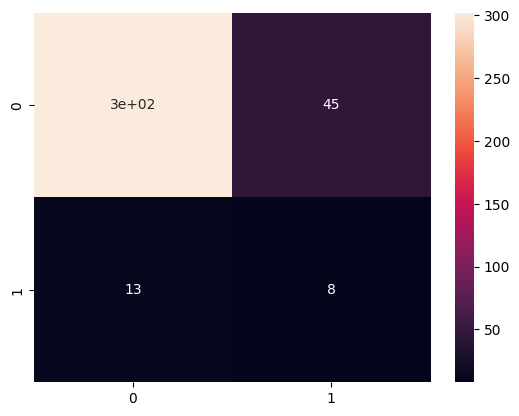

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       315
           1       0.38      0.15      0.22        53

    accuracy                           0.84       368
   macro avg       0.63      0.55      0.56       368
weighted avg       0.80      0.84      0.81       368



# TASK #8: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

<Axes: >

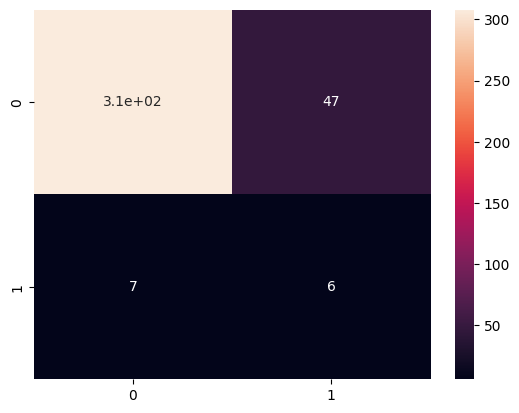

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       315
           1       0.46      0.11      0.18        53

    accuracy                           0.85       368
   macro avg       0.66      0.55      0.55       368
weighted avg       0.81      0.85      0.81       368



# TASK #9: TRAIN AND EVALUATE A DEEP LEARNING MODEL

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation ='relu', input_shape = (34, )))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 500)               17500     
                                                                 
 dense_7 (Dense)             (None, 500)               250500    
                                                                 
 dense_8 (Dense)             (None, 500)               250500    
                                                                 
 dense_9 (Dense)             (None, 1)                 501       
                                                                 
Total params: 519001 (1.98 MB)
Trainable params: 519001 (1.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
print("X_train shape:", X_train.shape, "dtype:", X_train.dtype)
print("y_train shape:", y_train.shape, "dtype:", y_train.dtype)

X_train shape: (1102, 34) dtype: float64
y_train shape: (1102,) dtype: int64


In [ ]:
epoch_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 0.4441 - accuracy: 0.8249
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 0.4008 - accuracy: 0.8385
Epoch 3/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3689 - accuracy: 0.8512
Epoch 4/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3609 - accuracy: 0.8530
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3400 - accuracy: 0.8603
Epoch 6/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3264 - accuracy: 0.8702
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3159 - accuracy: 0.8702
Epoch 8/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3118 - accuracy: 0.8702
Epoch 9/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3025 - accuracy: 0.8721
Epoch 10/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2970 - accuracy: 0.8838
Epoch 

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

12/12 [==============================] - 0s 2ms/step


In [ ]:
y_pred

array([[False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

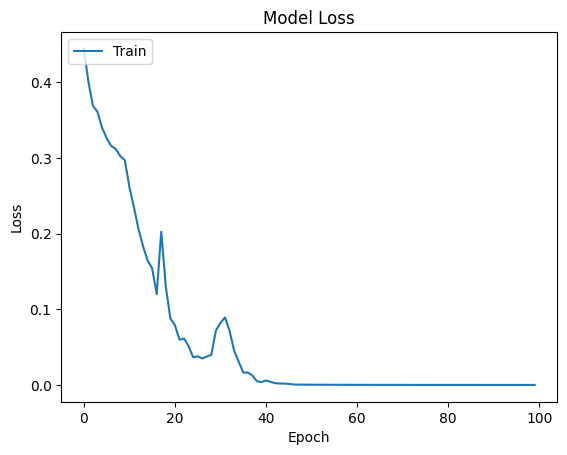

In [ ]:
plt.plot(epoch_hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

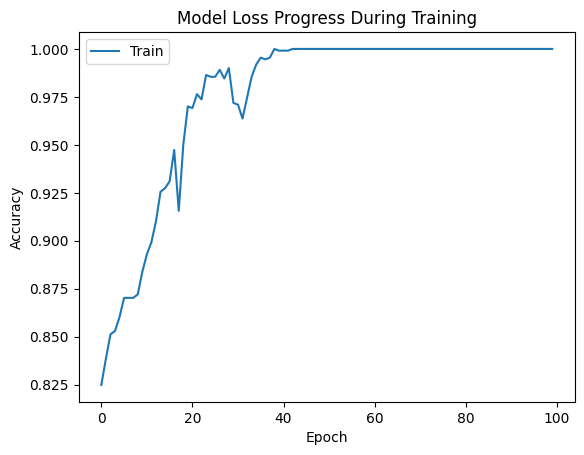

In [ ]:
plt.plot(epoch_hist.history['accuracy'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<Axes: >

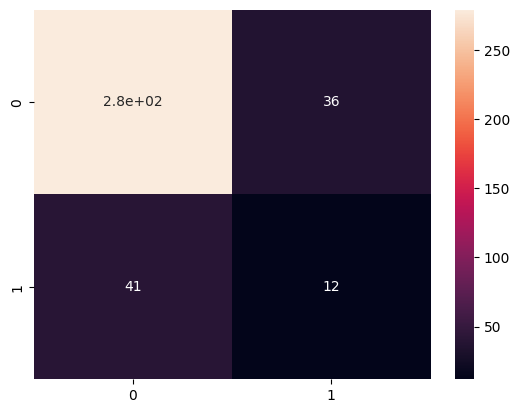

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       315
           1       0.25      0.23      0.24        53

    accuracy                           0.79       368
   macro avg       0.56      0.56      0.56       368
weighted avg       0.78      0.79      0.79       368



In [ ]:
# Testing Set Performance

